# Makina Öğrenmesi ile Dolar Kuru Tahmini

## Kullanılan Kütüphaneler
### Pandas : Pandas ile bir veri bilimi projesindeki veri okuma, veri ön işleme ve veri temizleme aşamaları yapılır.
### Numpy : Çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan ve matematiksel işlemler yapabileceğimiz bir kütüphanedir
### Keras : Neredeyse her tür derin öğrenme modelini tanımlamak ve eğitmek için uygun bir yol sağlayan Python için bir derin öğrenme kütüphanesidir.
### Matplotlib : Veri görselleştirmesinde kullandığımız temel python kütüphanesidir. 2 ve 3 boyutlu çizimler yapmamızı sağlar.
### Sklearn : Scikit-learn veya Sklearn makine öğrenmesi modelleri oluşturmak için kullanılan Python temelli bir kütüphanedir. Regresyon, kümeleme ve sınıflandırma için kullanılan pek çok öğrenme algoritmasına sahiptir. Sklearn NumPy ve SciPy ile uyumludur.

In [14]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('fivethirtyeight')

## Veriyi yahoo üzerinden çekme işlemi
## Verideki satır ve sütün sayısı

In [15]:
df = web.DataReader('USDTRY=X', data_source='yahoo',start='2006-01-01',end='2021-05-01')#tarih değeraralıkları
df.shape
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-02,1.35050,1.34250,1.35000,1.34950,0.0,1.34950
2006-01-03,1.34950,1.33500,1.34950,1.34200,0.0,1.34200
2006-01-04,1.34200,1.32750,1.34200,1.33280,0.0,1.33280
2006-01-05,1.33740,1.32750,1.33280,1.33250,0.0,1.33250
2006-01-06,1.33620,1.30750,1.33250,1.32800,0.0,1.32800
...,...,...,...,...,...,...
2021-04-25,8.47983,8.27817,8.40676,8.40616,0.0,8.40616
2021-04-26,8.29141,8.17930,8.28990,8.29030,0.0,8.29030
2021-04-27,8.23985,8.15870,8.22340,8.20594,0.0,8.20594


## Fiyat geçmişini veren grafik

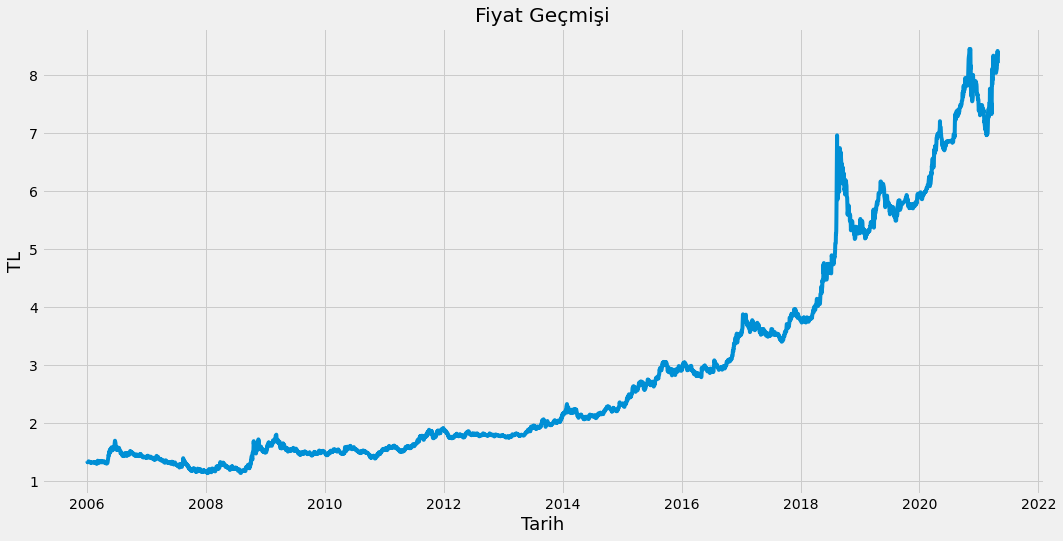

In [16]:
plt.figure(figsize=(16,8))
plt.title('Fiyat Geçmişi')
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('TL', fontsize=18)
plt.show()

## Kapanış fiyatları için yeni bir veri seti oluşturma işlemi
## Eğitilecek verinin büyüklüğünün hesaplanması

In [17]:
data = df.filter(['Close'])

dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

training_data_len


3174

## Veriyi ölçeklendirme işlemi (tüm veriyi 0 ile 1 arasında değerlere atama)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02839055],
       [0.02736291],
       [0.02610233],
       ...,
       [0.96786057],
       [0.96497623],
       [0.96497493]])

## Eğitilecek veri setinin oluşturulması
## Ölçeklendirilmiş verinin eğitilecek veri seti oluşturulması

In [19]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range (60,len (train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.02839055, 0.02736291, 0.02610233, 0.02606122, 0.02544462,
       0.02626675, 0.02756844, 0.02623934, 0.02647228, 0.02660931,
       0.02562276, 0.02667781, 0.02660931, 0.02640377, 0.02640377,
       0.02496505, 0.02475952, 0.02448548, 0.02493766, 0.02411553,
       0.02475952, 0.02475952, 0.02475952, 0.02475952, 0.02475952,
       0.02537612, 0.02571867, 0.02571867, 0.02571867, 0.02571867,
       0.02517058, 0.02523911, 0.02619824, 0.02537612, 0.02427995,
       0.02373188, 0.0238963 , 0.02475952, 0.02445808, 0.02434847,
       0.02334823, 0.02338932, 0.02263572, 0.02174509, 0.02212874,
       0.0232797 , 0.02592421, 0.02925379, 0.02825354, 0.02845907,
       0.02765065, 0.02636266, 0.02667781, 0.02400592, 0.02421145,
       0.02578718, 0.02745882, 0.02715738, 0.02736291, 0.02612972])]
[0.02804800993816886]

[array([0.02839055, 0.02736291, 0.02610233, 0.02606122, 0.02544462,
       0.02626675, 0.02756844, 0.02623934, 0.02647228, 0.02660931,
       0.02562276, 0.02667781, 0.02

## x_train ve y_train kümlerini numpy dizilerine dönüştürme

In [20]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Veriyi 3 boyutlu olacak şekilde yeniden şekillendirme işlemi 

In [21]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3114, 60, 1)

## Modelini oluşturma

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

## Modelin eğitilmesi

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3114/3114 [==============================] - 55s 16ms/step - loss: 7.0161e-04 0s - loss: 7.0401


## Test edilecek veri setlerinin oluşturulması

In [24]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

## Test edilcek verinin numpy dizisine dönüştürme

In [25]:
x_test = np.array(x_test)

## Test edilcek verinin 3 boyutlu şekilde yenidene şekillendirme

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1] ,1))

## Modelin tahmin ettiği fiyatları alma

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions
predictions.shape

(793, 1)

## (RMSE) Root mean squared error (Modelin hata alma ölçüsünün hesaplanması )

In [28]:
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse 

0.11198726818811097

## Veri grafiği 

<ipython-input-29-7698eeeb1def>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


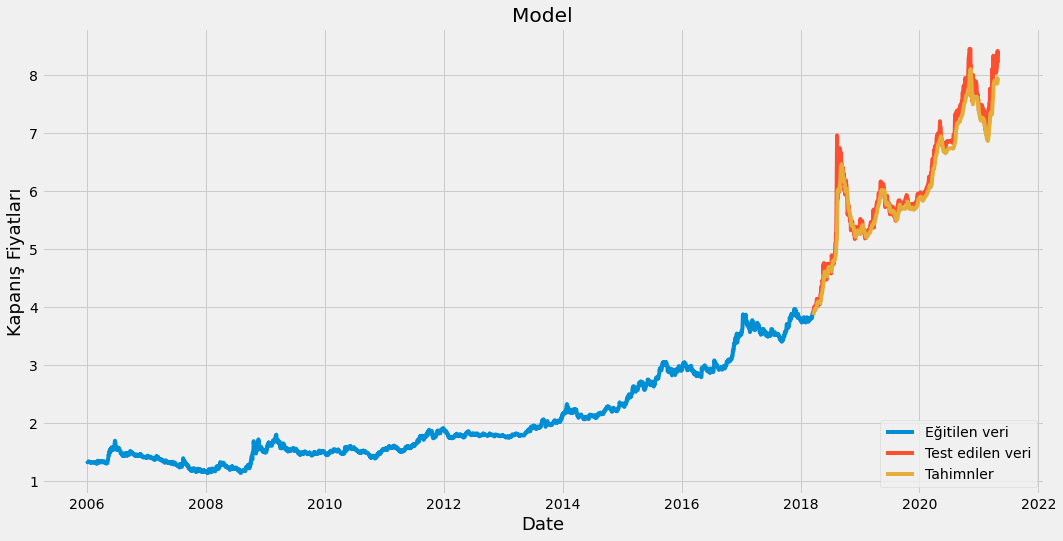

In [29]:
train = data [:training_data_len]
valid = data [training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Kapanış Fiyatları', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Eğitilen veri','Test edilen veri','Tahimnler'], loc= 'lower right')
plt.show()

## Gerçek ve tahmini fiyatlar

In [30]:
valid

,Close,Predictions
Date,,
2018-03-20,3.94329,3.860764
2018-03-21,3.93215,3.877421
2018-03-22,3.90877,3.892006
2018-03-23,3.97388,3.901220
2018-03-25,3.98140,3.914084
...,...,...
2021-04-25,8.40616,7.875447
2021-04-26,8.29030,7.916782
2021-04-27,8.20594,7.947881


In [31]:
usd_quote = web.DataReader('USDTRY=X', data_source='yahoo',start='2006-01-01',end='2021-05-01')

new_df = usd_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_dasys_scaled = scaler.transform(last_60_days)

x_test = []
x_test.append(last_60_dasys_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[7.959869]]


In [32]:
usd_quote2 = web.DataReader('USDTRY=X', data_source='yahoo',start='2021-05-02',end='2021-05-02')

print(usd_quote2['Close'])

Date
2021-05-02    8.27455
Name: Close, dtype: float64
